## TRABAJO FINAL - ANÁLISIS DE ENCUESTAS

##1) INTRODUCCIÓN

Esta base de datos corresponde a la cadena de Gimnasios "Fiter" de Argentina. A partir de las respuestas de los usuarios se buscará realizar un análisis y poder crear un modelo que pueda predecir el sentimiento de estos datos.

El objetivo es poder conocer las falencias y fortalezas desde el punto de vista de los usuarios activos y poder actuar para poder subsanar los puntos débiles o potenciar aquello que se percibe como positivo. Tambien asi poder predecir resultados de futuras encuestas y poder encaminar decisiones desde una perspectiva de buiseness intelligence.

##2) BASE DE DATOS - DESCRIPCIÓN

Encuesta de satisfaccion a los socios de la cadena de gimnasios "FITER". Se les hizo la siguiente pregunta: "Del 1 al 5, ¿Que tan probable es que recomiendes Fiter a un amigo?". El objetivo es conocer el índice NPS. El Net Promoter Score es un indicador que se utiliza para determinar la lealtad de los clientes a una empresa. Se mide a través de una encuesta que tiene una única pregunta.

* **index**: Índice
* **Respondent_id**: Número de identificación de los usuarios que respondieron.
* **date_created**: Fecha en la que respondieron la encuesta
* **NPS**: Calificacion que brindo el usuario como respuesta. Rango del 1 al 5, siendo 1 la mas baja y 5 la mas alta.
* **Comentario:** El comentario que brindo el usuario como devolución a la pregunta de la encuesta
* **Sucursal**: Sucursal que mas frecuenta el usuario por la cual responde la encuesta
* **Mes - Año:** Mes y año en el que contesto la encuesta
* **Clasificacion_NP:** - siendo los que califican entre 1 y 2 Detractores, 3 Pasivos, y los que califican 4 y 5 son Promotores. Detractores son aquellos que califican de forma negativa, Pasivos de forma neutra y Promotores de forma positiva




##3) DESARROLLO DEL TRABAJO

A) Importo librerías y datos para realizar el Análisis Exploratorio de Datos

In [ ]:
#EXPLORACIÓN
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import spacy
from spacy.lang.es import stop_words as stop_words
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk import word_tokenize
import nltk
from collections import Counter
nltk.download('punkt')

import re
import unicodedata

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#importo los datos que subi previamente a GITHUB
urldatos = "https://raw.githubusercontent.com/Sofyfox/Proyecto-Final-DSIII/main/Encuesta%20Fiter%20DS.csv"

datosfit = pd.read_csv(urldatos)

In [ ]:
#Una vez importado, muestro los datos de cabecera
datosfit.head()

,index,respondent_id,date_created,NPS,Comentario,Sucursal,Mes - Año,Clasificacion_NPS
0,0,114559953780,2024-03-22,3,Dejen de pedir el dni en las encuestas. No lo ...,Barrio Norte,03-2024,Pasivo
1,2,114558975890,2024-03-21,3,"Me gusta ir al gimnasio, pero lo encuentro muy...",Barrio Norte,03-2024,Pasivo
2,5,114558054710,2024-03-20,3,Porque el gimnasio mantiene un poco desorganiz...,Barrio Norte,03-2024,Pasivo
3,7,114554742648,2024-03-16,5,Buenas máquinas y buen ambiente.,Cid Campeador,03-2024,Promotor
4,8,118558256376,2024-03-13,5,Por el trato y cuidado recibido,Flores,03-2024,Promotor


# Creo un Data Frame con Clasificacion binaria.
Esta clasificaciión creará tres categorías asignando un valor numerico. Posteriormente eliminaremos los pasivos para poder contar con los extremos de manera que podamos hacer un analisis mas preciso.

In [ ]:
#Asigno valor numerico en una nueva columna.
datosfit["clasificacion_binaria"] = datosfit["Clasificacion_NPS"].apply(lambda clasificacion:{
    "Detractor":1,
    "Promotor":0,
    "Pasivo":2} [clasificacion])

In [ ]:
#muestro los datos
datosfit.head()

,index,respondent_id,date_created,NPS,Comentario,Sucursal,Mes - Año,Clasificacion_NPS,clasificacion_binaria
0,0,114559953780,2024-03-22,3,Dejen de pedir el dni en las encuestas. No lo ...,Barrio Norte,03-2024,Pasivo,2
1,2,114558975890,2024-03-21,3,"Me gusta ir al gimnasio, pero lo encuentro muy...",Barrio Norte,03-2024,Pasivo,2
2,5,114558054710,2024-03-20,3,Porque el gimnasio mantiene un poco desorganiz...,Barrio Norte,03-2024,Pasivo,2
3,7,114554742648,2024-03-16,5,Buenas máquinas y buen ambiente.,Cid Campeador,03-2024,Promotor,0
4,8,118558256376,2024-03-13,5,Por el trato y cuidado recibido,Flores,03-2024,Promotor,0


In [ ]:
#creo otro data frame que NO contenga los comentarios pasivos
datosfiltrados = datosfit[datosfit["Clasificacion_NPS"] != "Pasivo"]

In [ ]:
#Cuento y muuestro la cantidad de comentarios que estan en la categoria de Promotor y Detractor
datosfiltrados['Clasificacion_NPS'].value_counts()

,count
Clasificacion_NPS,
Promotor,8922
Detractor,1455


In [ ]:
#Dropeo las columnas que no requerimos para este proyecto
datosfinales= datosfiltrados.drop(["respondent_id", "date_created", "Sucursal", "Mes - Año"], axis="columns")

In [ ]:
#Muestro los datos finales que utilizaré
datosfinales.head()

,index,NPS,Comentario,Clasificacion_NPS,clasificacion_binaria
3,7,5,Buenas máquinas y buen ambiente.,Promotor,0
4,8,5,Por el trato y cuidado recibido,Promotor,0
5,10,2,Fui por musculacionpero no encontre ayuda en l...,Detractor,1
6,11,5,Son muy buenos y accesibles,Promotor,0
9,16,2,"En verano es imposible entrenar, los instructo...",Detractor,1


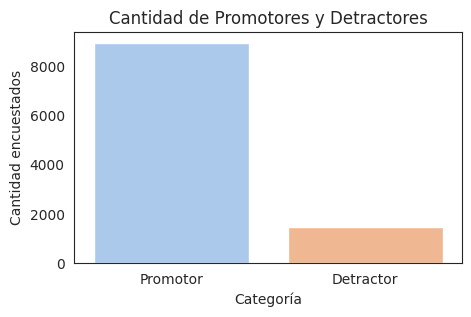

In [ ]:
#Presento gráfico con cantidad de promotores y Detractores. Afortunadamente, hay mayoría de promotores.
plt.figure(figsize=(5, 3))
sns.countplot(x="Clasificacion_NPS", data=datosfinales, hue="Clasificacion_NPS", palette="pastel")
plt.title("Cantidad de Promotores y Detractores")
plt.xlabel("Categoría")
plt.ylabel("Cantidad encuestados")
plt.show()

In [ ]:
#Porcentaje de cada valor
round(((datosfinales["Clasificacion_NPS"].value_counts() / len(datosfinales))*100),2)

,count
Clasificacion_NPS,
Promotor,85.98
Detractor,14.02


In [ ]:
datosfinales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10377 entries, 3 to 13214
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  10377 non-null  int64 
 1   NPS                    10377 non-null  int64 
 2   Comentario             10377 non-null  object
 3   Clasificacion_NPS      10377 non-null  object
 4   clasificacion_binaria  10377 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 486.4+ KB


# Organización y transformación de la información

In [ ]:
#Normalizo los comentarios, los llevo a todos a letra minúscula
datosfinales["Comentario"] = datosfinales["Comentario"].str.lower()

datosfinales.head()

,index,NPS,Comentario,Clasificacion_NPS,clasificacion_binaria
3,7,5,buenas máquinas y buen ambiente.,Promotor,0
4,8,5,por el trato y cuidado recibido,Promotor,0
5,10,2,fui por musculacionpero no encontre ayuda en l...,Detractor,1
6,11,5,son muy buenos y accesibles,Promotor,0
9,16,2,"en verano es imposible entrenar, los instructo...",Detractor,1


In [ ]:
#creo un diccionario que reemplaze cada tilde por una vocal
tildes= {"á":"a", "é":"e", "í":"i","ó":"o", "ú":"u"}
type(tildes)

dict

In [ ]:
comentarios= list(datosfinales["Comentario"].values)


In [ ]:
#Creamos una nueva lista que contenga los comentarios SIN tildes
comentarios_sin_tildes = []

for comentario in comentarios: #para cada comentario en la lista de comentarios
    comentario_sin_tilde = "" #Inicio una cadena  por cada comentario
    for letra in comentario: #para cada letra en los comentarios
      if letra in tildes: #Si la letra se encuetra en el diccionario de vocales
            comentario_sin_tilde += tildes[letra] #Se reemplaza la letra con tilde por la letra sin tilde
      else:#si no tiene tilde
            comentario_sin_tilde += letra #Se deja la misma letra
    comentarios_sin_tildes.append(comentario_sin_tilde)# En la lista comertarios_sin_tildes se apendea los nuevos comentarios sin tildes

comentarios_sin_tildes

['buenas maquinas y buen ambiente. ',
 'por el trato y cuidado recibido',
 'fui por musculacionpero no encontre ayuda en los profes: la clase de spinun por video en mi caso no me sirvio y  no me gusta',
 'son muy buenos y accesibles',
 'en verano es imposible entrenar, los instructores no ordenan el lugar, solo usan el celular o hablan',
 'variedad de actividades que ofrece. la calidad del personal del club, incluidos los entrenadores y el personal de apoyo,profesionales capacitados que puedan ayudarlos a mejorar su rendimiento ambiente amigable y acogedor',
 'buenas clases ',
 'los grupos estan muy llenos',
 'las instalaciones, los horarios.',
 'son buenos gimnasios ',
 'bien pero los cursos no estan demasiado centrados en las piernas',
 'porque me gusta y tiene lo que necesito ',
 'esta todo muy ordenado y lindo.  la sede cid campeador tiene lugar para entrenar al aire libre muy amplio que esta buenisimo.',
 'me gusta',
 'es un lugar siempre limpio y ordenado, con profesionales de ca

In [ ]:
#Le agrego una nueva columna que contenga los comentarios sin las tildes
datosfinales["comentarios_finales"]= comentarios_sin_tildes
datosfinales

,index,NPS,Comentario,Clasificacion_NPS,clasificacion_binaria,comentarios_finales
3,7,5,buenas máquinas y buen ambiente.,Promotor,0,buenas maquinas y buen ambiente.
4,8,5,por el trato y cuidado recibido,Promotor,0,por el trato y cuidado recibido
5,10,2,fui por musculacionpero no encontre ayuda en l...,Detractor,1,fui por musculacionpero no encontre ayuda en l...
6,11,5,son muy buenos y accesibles,Promotor,0,son muy buenos y accesibles
9,16,2,"en verano es imposible entrenar, los instructo...",Detractor,1,"en verano es imposible entrenar, los instructo..."
...,...,...,...,...,...,...
13209,26055,5,excelentes instalaciones y las clases grupales...,Promotor,0,excelentes instalaciones y las clases grupales...
13210,26059,1,por q los entrenadores no ofrecen sus servici...,Detractor,1,por q los entrenadores no ofrecen sus servici...
13212,26063,1,las máquinas ya están viejas. muchas ya no sir...,Detractor,1,las maquinas ya estan viejas. muchas ya no sir...
13213,26065,5,la profesora de funcional del fiter punta car...,Promotor,0,la profesora de funcional del fiter punta car...


In [ ]:
#Elimino los signos de puntuación y simbolos de la nueva columna creada
datosfinales["comentarios_finales"] = datosfinales["comentarios_finales"].apply(
    lambda x: re.sub('[^a-z0-9ñ]+', ' ', x))
datosfinales

,index,NPS,Comentario,Clasificacion_NPS,clasificacion_binaria,comentarios_finales
3,7,5,buenas máquinas y buen ambiente.,Promotor,0,buenas maquinas y buen ambiente
4,8,5,por el trato y cuidado recibido,Promotor,0,por el trato y cuidado recibido
5,10,2,fui por musculacionpero no encontre ayuda en l...,Detractor,1,fui por musculacionpero no encontre ayuda en l...
6,11,5,son muy buenos y accesibles,Promotor,0,son muy buenos y accesibles
9,16,2,"en verano es imposible entrenar, los instructo...",Detractor,1,en verano es imposible entrenar los instructor...
...,...,...,...,...,...,...
13209,26055,5,excelentes instalaciones y las clases grupales...,Promotor,0,excelentes instalaciones y las clases grupales...
13210,26059,1,por q los entrenadores no ofrecen sus servici...,Detractor,1,por q los entrenadores no ofrecen sus servicios
13212,26063,1,las máquinas ya están viejas. muchas ya no sir...,Detractor,1,las maquinas ya estan viejas muchas ya no sirv...
13213,26065,5,la profesora de funcional del fiter punta car...,Promotor,0,la profesora de funcional del fiter punta car...


In [ ]:
#Cantidad de Tokens Iniciales y FINALES de las transformaciones
tokens = [word_tokenize(comentario) for comentario in datosfinales['Comentario']]
tokens_iniciales = [item for sublist in tokens for item in sublist]
print("TOKENS ANTES: ", len(set(tokens_iniciales)))

tokens = [word_tokenize(comentario) for comentario in datosfinales['comentarios_finales']]
tokens_finales = [item for sublist in tokens for item in sublist]
print("TOKENS FINALES: ", len(set(tokens_finales)))

TOKENS ANTES:  9775
TOKENS FINALES:  8728


In [ ]:
# Eliminacion de palabras vacias
stop_words = list(stop_words.STOP_WORDS)

tokensunicos = []

for elemento in tokens_finales:
  if elemento not in stop_words:
    tokensunicos.append(elemento)

In [ ]:
#muestro la cantidad de tokens unicos al eliminar las palabras vacias
len(set(tokensunicos))

8348

#Búsqueda de palabras que tienen Mayor y menor frecuencia
Se eliminaran aquellas palabras que tengan menor aparición dado que, como se observará en los graficos, suelen ser palabras mal escritar o que no aportan al contexto de analisis.


In [ ]:
percentil_1 = int(len(set(tokensunicos))*0.01)

percentil_1

83

In [ ]:
#Las palabras mas frecuentes:
top1 = Counter(tokensunicos).most_common(percentil_1)
top1

[('maquinas', 2742),
 ('clases', 1825),
 ('gimnasio', 1140),
 ('gente', 1111),
 ('lugar', 994),
 ('precio', 891),
 ('ambiente', 792),
 ('atencion', 744),
 ('instalaciones', 740),
 ('profesores', 721),
 ('profes', 650),
 ('limpieza', 612),
 ('calidad', 577),
 ('excelente', 567),
 ('horarios', 556),
 ('espacio', 548),
 ('gym', 541),
 ('limpio', 520),
 ('gusta', 519),
 ('falta', 463),
 ('entrenar', 441),
 ('completo', 440),
 ('personal', 438),
 ('variedad', 425),
 ('cantidad', 423),
 ('sede', 397),
 ('q', 347),
 ('musculacion', 345),
 ('fiter', 324),
 ('servicio', 323),
 ('relacion', 319),
 ('aparatos', 305),
 ('comodo', 291),
 ('amplio', 281),
 ('faltan', 278),
 ('aire', 273),
 ('sedes', 272),
 ('equipamiento', 270),
 ('horario', 267),
 ('clase', 263),
 ('elementos', 263),
 ('excelentes', 261),
 ('profe', 257),
 ('sucursal', 253),
 ('mantenimiento', 239),
 ('onda', 236),
 ('agradable', 230),
 ('equipos', 228),
 ('personas', 221),
 ('tiempo', 220),
 ('sucursales', 219),
 ('salon', 218),
 

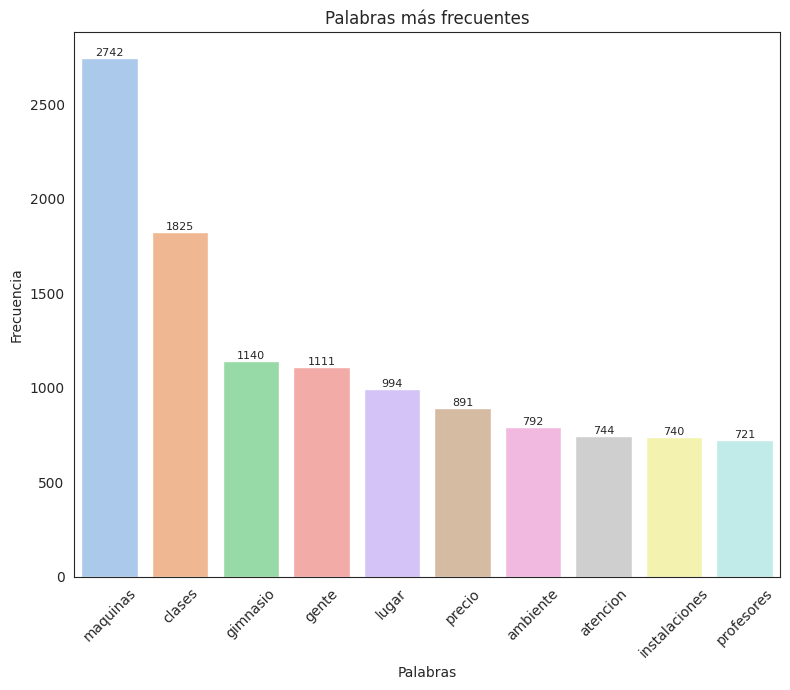

In [ ]:
#Gráfico con las palabras mas frecuentes
mayor_frecuencia = pd.DataFrame(top1[:10], columns=['Palabras','Frecuencia']).set_index('Palabras')
sns.set_style('white')

plt.subplots(figsize=(8,7))
mayor_frecuencia_grafico = sns.barplot(x=mayor_frecuencia.index, y=mayor_frecuencia['Frecuencia'].values, hue=mayor_frecuencia.index, palette='pastel')
mayor_frecuencia_grafico.set(xlabel='Palabras', ylabel='Frecuencia', title='Palabras más frecuentes')
mayor_frecuencia_grafico.set_xticks(mayor_frecuencia.index)
mayor_frecuencia_grafico.set_xticklabels(mayor_frecuencia_grafico.get_xticklabels(), rotation=45)

for container in mayor_frecuencia_grafico.containers:
  mayor_frecuencia_grafico.bar_label(container, fontsize=8)



plt.tight_layout()
plt.show()

In [ ]:
#Muestro las menos frecuentes. Al aparecer 1 sola vez, no es necesario mostrarlo en grafico.
percentil_negativo = Counter(tokensunicos).most_common()[-percentil_1:]
percentil_negativo[:20]

[('imparten', 1),
 ('solucionarlo', 1),
 ('cualidad', 1),
 ('orientame', 1),
 ('busque', 1),
 ('gynasio', 1),
 ('pernas', 1),
 ('filtracion', 1),
 ('peleandote', 1),
 ('serviria', 1),
 ('parada', 1),
 ('estalladas', 1),
 ('joda', 1),
 ('ensucian', 1),
 ('lrcdll', 1),
 ('ondas', 1),
 ('mixtas', 1),
 ('enojan', 1),
 ('estrechar', 1),
 ('incumplen', 1)]

In [ ]:
#Una vez que obtengo las palabras menos frecuentos, lo sumo a las Stop Words
stop_words.extend([palabra for palabra,valor in percentil_negativo])

In [ ]:
totalpalabras= ''.join(datosfinales["comentarios_finales"])
totalpalabras

'buenas maquinas y buen ambiente por el trato y cuidado recibidofui por musculacionpero no encontre ayuda en los profes la clase de spinun por video en mi caso no me sirvio y no me gustason muy buenos y accesiblesen verano es imposible entrenar los instructores no ordenan el lugar solo usan el celular o hablanvariedad de actividades que ofrece la calidad del personal del club incluidos los entrenadores y el personal de apoyo profesionales capacitados que puedan ayudarlos a mejorar su rendimiento ambiente amigable y acogedorbuenas clases los grupos estan muy llenoslas instalaciones los horarios son buenos gimnasios bien pero los cursos no estan demasiado centrados en las piernasporque me gusta y tiene lo que necesito esta todo muy ordenado y lindo la sede cid campeador tiene lugar para entrenar al aire libre muy amplio que esta buenisimo me gustaes un lugar siempre limpio y ordenado con profesionales de calidad y muy amables el lugar es grande aunque se llena demasiado en determinados h

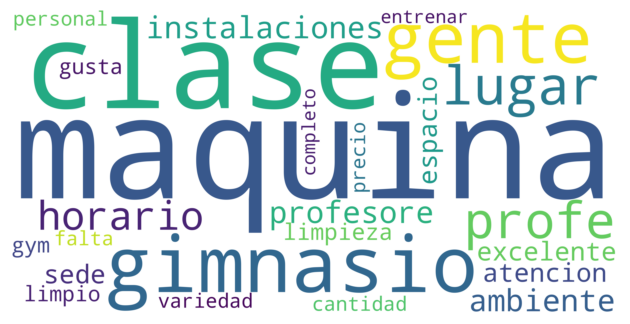

In [ ]:
#WordCloud final
wordcloudfiter = WordCloud(
    max_font_size=100,
    max_words=25,
    background_color="white",
    scale=15,
    stopwords=stop_words,

).generate(totalpalabras)

plt.imshow(wordcloudfiter, interpolation="bilinear")
plt.axis("off")


plt.tight_layout()
plt.show()

##Implementamos modelos

In [ ]:
X=datosfinales['comentarios_finales']
Y=datosfinales["clasificacion_binaria"]


#Regresion Lineal

In [ ]:
#Regresión Lineal
#Separo los datos de entrenamiento y test 30/70
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=16)

#aplico Count vectorizer para las StopWords
count_vectorizer = CountVectorizer(stop_words=stop_words)

X_train_lr= count_vectorizer.fit_transform(X_train)

X_test_lr= count_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=5000)

clf.fit(X_train_lr, y_train)


print(f"X_train_shape: {X_train.shape}")
print(f"X_test_shape: {X_test.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"y_test_shape: {y_test.shape}")

X_train_shape: (7263,)
X_test_shape: (3114,)
y_train_shape: (7263,)
y_test_shape: (3114,)


In [ ]:
X_train_lr

X_test_lr

test_pred_lr_prob = clf.predict_proba(X_test_lr)

y_pred=clf.predict(X_test_lr)

Evaluamos el de la Regresión Logística. Específicamente, dos métricas: el F1-score y la precisión (accuracy).

In [ ]:
print("F1 score Regresión Logistica: {:.2f}".format(f1_score(y_test,y_pred)*100))
print("Accuracy Regresión Logistica: {:.2f}".format(accuracy_score(y_test,y_pred)* 100))

F1 score Regresión Logistica: 54.69
Accuracy Regresión Logistica: 88.99


 Un F1-score de 54.69 significa que el modelo está teniendo dificultades para identificar correctamente los casos.

#Random Forest

In [ ]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=16)

count_vectorizer_rf = CountVectorizer(stop_words=stop_words)

random_forest_model = RandomForestClassifier(n_estimators=200)

X_train_rf= count_vectorizer_rf.fit_transform(X_train)

X_test_rf= count_vectorizer_rf.transform(X_test)

random_forest_model.fit(X_train_rf, y_train)

test_pred_rf_prob = random_forest_model.predict_proba(X_test_rf)
test_pred_rf_all = random_forest_model.predict(X_test_rf)

In [ ]:
print("F1 score Random Forest: {:.2f}".format(f1_score(y_test,test_pred_rf_all)*100))
print("Accuracy Random Forest: {:.2f}".format(accuracy_score(y_test,test_pred_rf_all)* 100))

F1 score Random Forest: 46.60
Accuracy Random Forest: 87.64


EN este caso, el resultado fue levemente peor al de regresion lineal por lo que nos quedaremos con el primero modelo.

Vectorizacion TF-IDF
Lo aplico al modelo de regresión lineal

In [ ]:
#Vectorizador TF-IDF
tfidf_counts = TfidfVectorizer(ngram_range=(1,1)) #Este parámetro especifica el rango de n-gramas que se considerarán. indica que solo se considerarán unigramas
X_train_tfidf = tfidf_counts.fit_transform(X_train)
X_test_tfidf = tfidf_counts.transform(X_test)

In [ ]:
# Instancio modelo
lr_model_tf_idf = LogisticRegression(max_iter= 10000, penalty ='l2', solver= 'lbfgs')

# Entreno
lr_model_tf_idf.fit(X_train_tfidf, y_train)

# Predigo
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

In [ ]:
## Evaluar el modelo
print("F1 score Regresión logistica con TF-IDF: {:.2f}".format(f1_score(y_test, test_pred_lr_all)*100))

print("Accuracy Regresión logistica con TF-IDF: {:.2f}".format(accuracy_score(y_test, test_pred_lr_all) * 100))

F1 score Regresión logistica con TF-IDF: 57.22
Accuracy Regresión logistica con TF-IDF: 90.21


Al usar TF-IDF mejora en un 5% aproximadamente el F1 y en un 3% el accuracy.

##CONCLUSIÓN
La implementación de TF-IDF en mi modelo de regresión lineal ha arrojado una mejora del 5% en el desempeño. Sin embargo, los resultados generales aún no cumplen con las expectativas.
Un análisis más profundo sugiere que la presencia de errores ortográficos, palabras vacías y la falta de experiencia en la implementación podrían estar influyendo en el rendimiento final. Es necesario profundizar en la limpieza de los datos y explorar herramientas más especializadas para optimizar el modelo.
Por ultimo, considero que al tener pocos comentarios Detractores o, negativos, el modelo esta sesgado y no cuenta con una base amplia sobre la cual poder trabajar por lo que sería conveniente conseguir una mayor cantidad de datos.